
#  Linear Regression

## PETE 2061 Lab 9 Workbook 

## THIS IS DUE BY 8:00 AM on April 6, 2020

## Decline Curve Analysis
In the prediction of production data, the exponential decline curve analysis is very effective. The equation takes the following form:  
$$q=q_ie^{-D_i t}$$  
  
Where $q$ is the current production rate (BBL/day), $q_i$ is the initial production rate (BBL/day), $d$ is the decline rate, and $t$ is the time (days).

1. Take the natural logarithm of both sides of this equation and type the straight line equation you obtain into the cell below.
2. Also type in the parameter that represents the dependent (or response) variable, the independent (or exploratory) variable, the slope and intercept in this straight-line equation.

 Type in answers to 1 and 2 here.

3. Import rate and time data stored in wellA.csv and display the dataframe.

In [9]:
import pandas as pd
inputDF = pd.read_csv('wellA.csv')
inputDF

,time (days),rate (bopd)
0,0,2000.0
1,100,1743.2
2,200,1690.6
3,300,1482.4
4,400,1404.6
5,500,1164.0
6,600,1029.7
7,700,949.0
8,800,829.0
9,900,777.6


4. Make a scatter plot of the rate versus time

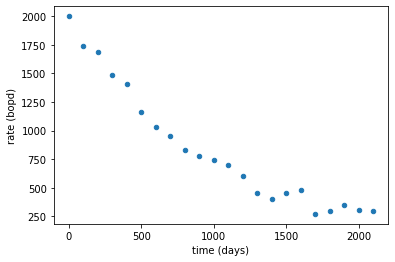

In [16]:
import numpy as np
import scipy.stats as ss 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
df  = pd.read_csv("wellA.csv")

df.plot(kind='scatter',x='time (days)',y='rate (bopd)') # scatter plot


5. Using the idea from problem 1, transform this data such that it plots roughly as data points following a straight line. <br> 
Hint: This will require plotting the natural logarithm instead of the actual value on the x or y axis.

,time (days),rate (bopd),log (time),log (rate)
0,0,2000.0,-inf,7.600902
1,100,1743.2,4.605170,7.463478
2,200,1690.6,5.298317,7.432839
3,300,1482.4,5.703782,7.301418
4,400,1404.6,5.991465,7.247508
5,500,1164.0,6.214608,7.059618
6,600,1029.7,6.396930,6.937023
7,700,949.0,6.551080,6.855409
8,800,829.0,6.684612,6.720220
9,900,777.6,6.802395,6.656212


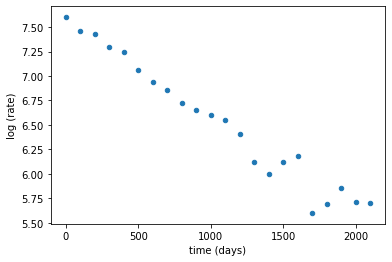

In [36]:
import numpy as np
import scipy.stats as ss 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df  = pd.read_csv("wellA.csv")
df['log (time)'] = np.log(df['time (days)'])
df['log (rate)'] = np.log(df['rate (bopd)'])
df.plot(kind='scatter', x='time (days)',y='log (rate)') # scatter plot
df

6. Perform linear regression on the transformed linear data and provide the slope, intercept, coefficient of regression, P-value and standard error

In [50]:
import numpy as np
import scipy.stats as ss 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

df  = pd.read_csv("wellA.csv")

df['log (rate)'] = np.log(df['rate (bopd)'])
 
X = df['time (days)'].values.reshape(-1,1)
y = df['log (rate)'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())


The linear model is: Y = 7.5591 + -0.00097346X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     563.9
Date:                Mon, 06 Apr 2020   Prob (F-statistic):           3.98e-16
Time:                        01:01:04   Log-Likelihood:                 16.115
No. Observations:                  22   AIC:                            -28.23
Df Residuals:                      20   BIC:                            -26.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const

7. Plot both your fitted straight-line model as well as the transformed data on the same graph.

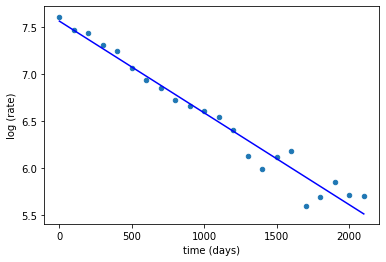

In [52]:
import numpy as np
import scipy.stats as ss 
import pandas as pd 
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

df  = pd.read_csv("wellA.csv")

df['log (rate)'] = np.log(df['rate (bopd)'])

df.plot(kind='scatter', x='time (days)',y='log (rate)') 
    
X = df['time (days)'].values.reshape(-1,1)
y = df['log (rate)'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)
predictions = reg.predict(X)
plt.plot(df['time (days)'], predictions, c='blue')

